In [5]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Práctica 1

# Programar en python el cálculo de las siguiente escalas típicas del problema:
# U, Ro, Ef, Ev1, deltai, deltaf, deltav1, Wi, Wf, Wv1,
# Para calcular los parámetros, usar las magnitudes típicas mostradas
# en la tabla del documento "circulacion-2c2020/tutoriales/Modelo-oceanico"

def parametros(tau, L, D, k, A, beta, rho):

    """
    Calculo de los parametros para la simulación

    INPUTS
    tau: Tension del viento [N/m^2]
    L: Longitud de la cuenca [m]
    D: Profundidad [m]
    k: Coeficiente de fricción de fondo [1/s]
    A: Coeficiente de viscosidad lateral [m^2/s]
    beta: Coeficiente de Coriolis [1/(s*m)]
    rho: Densidad [kg/m^3]

    OUTPUTS
    U: Escala típica velocidad [m/s]
    Ro: Número de Rossby
    Ef: Número de Ekman vertical
    Ev1: Número de Ekman horizontal
    deltai: Parámetro de la corriente de borde oeste por efectos inerciales
    Wi: Ancho de la corriente de borde oeste por efectos inerciales  [m]
    deltaf: Parámetro de la corriente de borde oeste por fricción de fondo
    Wf: Ancho de la corriente de borde oeste por fricción de fondo [m]
    deltav1: Parámetro de la corriente de borde oeste por fricción lateral
    Wv1: Ancho de la corriente de borde oeste por fricción lateral [m]

    """

    # Cargamos las librerias necesarias
    import math

    U = (2*math.pi*tau)/(rho*D*beta*L) # Velocidad
    Ro = (2*math.pi*tau)/(rho*D*(math.pow(beta,2)*(math.pow(L,3)))) # Numero de Rossby
    Ef = k/(beta*L)  # Numero de Ekman vertical
    Ev1 = A/(beta*(math.pow(L,3))) # Numero de Ekman Horizontal
    deltai = math.sqrt(Ro) # Efectos inerciales
    deltaf = Ef
    deltav1 = math.pow(Ev1,1/3)
    Wi = deltai*L
    Wf = deltaf*L
    Wv1 = deltav1*L

    return U, Ro, Ef, Ev1, deltai, deltaf, deltav1, Wi, Wf, Wv1


tau = 0.25 #Tension del viento [N/m^2]
L = 4000000 # Longitud de la cuenca [m]
D = 2500 # Profundidad [m]
beta = 2e-11 # Coeficiente de Coriolis [1/(s*m)]
rho = 1025 # Densidad [kg/m^3]
A = 0 # Coeficiente de viscosidad lateral [m^2/s]

k_P1E1 = 1.16e-5 # Coeficiente de fricción de fondo [1/s]
k_P1E2 = 3.16e-5 # Coeficiente de fricción de fondo [1/s]
k_P1E3 = 5.16e-5 # Coeficiente de fricción de fondo [1/s]

U_P1E1, Ro_P1E1, Ef_P1E1, Ev1_P1E1, deltai_P1E1, deltaf_P1E1, deltav1_P1E1, Wi_P1E1, Wf_P1E1, Wv1_P1E1 = parametros(tau, L, D, k_P1E1, A, beta, rho)
U_P1E2, Ro_P1E2, Ef_P1E2, Ev1_P1E2, deltai_P1E2, deltaf_P1E2, deltav1_P1E2, Wi_P1E2, Wf_P1E2, Wv1_P1E2 = parametros(tau, L, D, k_P1E2, A, beta, rho)
U_P1E3, Ro_P1E3, Ef_P1E3, Ev1_P1E3, deltai_P1E3, deltaf_P1E3, deltav1_P1E3, Wi_P1E3, Wf_P1E3, Wv1_P1E3 = parametros(tau, L, D, k_P1E3, A, beta, rho)

print(f"Los valores de eps (Ef) son \nSimulación 1: {Ef_P1E1:.3f} \nSimulación 2: {Ef_P1E2:.3f} \nSimulación 3: {Ef_P1E3:.3f}") 


Los valores de eps (Ef) son 
Simulación 1: 0.145 
Simulación 2: 0.395 
Simulación 3: 0.645


In [2]:
#---------------------------------------------------------------------------------#
# Ejercicio 1

# Cargamos la salida del modelo

def cargar(dir_salida,Lx,Ly,nx,ny):

    """
    Para importar esta funcion, es necesario definir todos los inputs y correr las siguientes dos líneas

    from cargar_salida_QG import cargar
    psi_temp, vort_temp, psiF, vortF, QG_diag, QG_curlw, X, Y, dx, dy = cargar(dir_salida, Lx, Ly, nx, ny)

    Extraccion de los datos de salida del modelo

    INPUTS
    dir_salida: str, direccion de la salida
    Lx: float, tamano de la cuenca (direccion X)
    Ly: float, tamano de la cuenca (direccion Y)
    nx: int, numero de punto de grilla (direccion X)
    ny: int, numero de punto de grilla (direccion Y)

    OUTPUTS
    psi_temp: Campos de función de corriente de todos los tiempos
    vort_temp: Campos de vorticidada de todos los tiempos
    psiF: Campo de función de corriente del tiempo final
    vortF: Campo de vorticidad del tiempo final
    QG_diag: Información temporal de función corriente, vorticidad y energía cinética en el punto central del dominio
    QG_curlw: Campo del rotor del esfuerzo del viento utilizado en la simulación
    X: Vector con los puntos del eje X dimensionalizado
    Y: Vector con los puntos del eje Y dimensionalizado
    dx: Distancia entre puntos del eje X
    dy: Distancia entre puntos del eje y

    """

    #Cargamos las librerias necesarias
    import os
    import numpy as np

    archivos = os.listdir(dir_salida) # nombre de los archivos en el directorio actual + \output

    tiempos = 0

    for name in archivos:
        if name[0:3] == 'psi':
            tiempos = tiempos+1

    # Creacion de las matriz para recibir los datos
    psi_temp = np.empty(shape=[ny+2,nx+2,tiempos])
    psi_temp[:] = np.nan
    vort_temp = np.empty(shape=[ny+2,nx+2,tiempos])
    vort_temp[:] = np.nan

    # Extraccion
    for name in archivos:
        if name[0:3] == 'psi':
            k1 = name[3]+name[4]
            psi_temp[:,:,int(k1)-1] = np.loadtxt(dir_salida+name) #fromfile(name)
        if name[0:3] =='vor':
            k2 = name[3]+name[4]
            vort_temp[:,:,int(k2)-1] = np.loadtxt(dir_salida+name) #fromfile(name)
        if name[0:7] == 'QG_diag':
            QG_diag = np.loadtxt(dir_salida+name) #fromfile(name)
            # En el punto central del dominio
            # (Tiempo, Funcion Corriente,Vorticidad, EnCin)
        if name[0:7] == 'QG_wind':
            QG_curlw = np.loadtxt(dir_salida+name) #fromfile(name)

    # Recorte de los datos
    a1 = 1; a2 = np.size(vort_temp,0)-1;
    b1 = 1; b2 = np.size(vort_temp,1)-1;

    psi_temp = psi_temp[a1:a2,b1:b2,:]
    psiF = psi_temp[:,:,np.size(psi_temp,2)-1]

    vort_temp = vort_temp[a1:a2,b1:b2,:]
    vortF = vort_temp[:,:,np.size(vort_temp,2)-1]

    X = np.linspace(0,Lx,num=nx)
    Y = np.linspace(0,Ly,num=ny)

    dx = Lx/(nx-1);
    dy = Ly/(ny-1);

    return psi_temp, vort_temp, psiF, vortF, QG_diag, QG_curlw, X, Y, dx, dy


Lx = 4000
Ly = 2000
nx = 200
ny = 100

dir_salida_P1E1 = '/home/jovyan/circulacion-2c2020/modulo_oceano/modeloQG/out_tmp1/'
psi_temp_P1E1, vort_temp_P1E1, psiF_P1E1, vortF_P1E1, QG_diag_P1E1, QG_curlw_P1E1, X_P1E1, Y_P1E1, dx_P1E1, dy_P1E1 = cargar(dir_salida_P1E1, Lx, Ly, nx, ny)

In [3]:
## Inspeccionamos las variables cargadas
%whos

Variable          Type        Data/Info
---------------------------------------
A                 int         0
D                 int         2500
Ef_P1E1           float       0.14500000000000002
Ef_P1E2           float       0.3950000000000001
Ef_P1E3           float       0.645
Ev1_P1E1          float       0.0
Ev1_P1E2          float       0.0
Ev1_P1E3          float       0.0
L                 int         4000000
Lx                int         4000
Ly                int         2000
QG_curlw_P1E1     ndarray     102x202: 20604 elems, type `float64`, 164832 bytes (160.96875 kb)
QG_diag_P1E1      ndarray     2000x4: 8000 elems, type `float64`, 64000 bytes
Ro_P1E1           float       2.3945065957239276e-05
Ro_P1E2           float       2.3945065957239276e-05
Ro_P1E3           float       2.3945065957239276e-05
U_P1E1            float       0.007662421106316568
U_P1E2            float       0.007662421106316568
U_P1E3            float       0.007662421106316568
Wf_P1E1           floa

(<matplotlib.contour.QuadContourSet at 0x7f2875e10d30>,
 <matplotlib.colorbar.Colorbar at 0x7f2875ed4a30>)

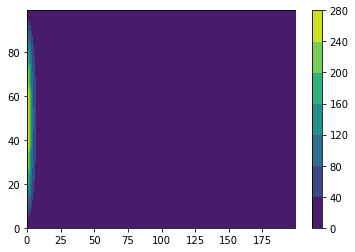

In [8]:
plt.contourf(vortF_P1E1), plt.colorbar()

In [ ]:
## a) Estabilizacion del modelo

def graf_ecin():

    """
    Grafico de energia cinetica

    INPUTS

    """



In [ ]:
## b) Graficar el campo de funcion corriente, vorticidad relativa y transporte meridional. Todo con dimensiones

def graf_psiF():

    """
    Gráfico de función corriente

    INPUTS

    """

#%%

def graf_vortF():

    """
    Gráfico de vorticidad

    INPUTS

    """

#%%

def graf_TrasMer():

    """
    Gráfico de transporte meridional

    INPUTS

    """

#%%



In [ ]:
## c) Graficar un corte zonal del transporte meridional a la latitud central de la cuenca

def graf_TrasMer_LatCent():

    """
    Gráfico de transporte meridional en la latitud central de la cuenca

    INPUTS

    """

#%%

def graf_vortF_LatCent():

    """
    Gráfico de vorticidad relativa en la latitud central de la cuenca

    INPUTS

    """

#%%



In [ ]:
#---------------------------------------------------------------------------------#
# Ejercicio 2

# Estimar para cada simulación 
# a) el transporte meridional de la CBO (en Sv),
# b) el transporte meridional total (en Sv) y 
# c) la extensión zonal de la CBO (en km).

def Calc_TrasMer_CBO_LatCent():
    """
    Calculo de transporte total meridional de la Corriente de Borde Oeste en la latitud central

    INPUTS


    OUTPUTS
    """

    return 

#%%

def Calc_TrasMer_Total_LatCent():
    """
    Calculo de transporte total meridional en la latitud central

    INPUTS


    OUTPUTS
    """
  
    return 

#%%

def Calc_Ext_CBO_LatCent(psiF_todos, dx_todos):
    """
    Extensión de la Corriente de Borde Oeste en la latitud central

    INPUTS


    OUTPUTS
    """
   
    return 

#%%

In [ ]:
#---------------------------------------------------------------------------------#
# Ejercicio 3

# Estimar para una simulación cada uno de los términos de la ecuación
# Calculo del gráfico de los términos de la ecuación estacionaria del modelo de Stommel en la latitud central de la cuenca para la simulación 1

def graf_terminos_ModStommel():
    """
    Gráfico de los términos de la ecuación estacionaria del modelo de Stommel en la latitud central de la cuenca para una simulación

    INPUTS

    """
